In [2]:
import numpy as np
import matplotlib.pyplot as plt
def selectK():
    K = input("Select the value of K :")
    done = False
    while not done:
        try :
            K = int(K)
            done = True
        except:
            K = input("Try again")
    return K

def select_dataset_boundaries():
    a = input("Select the value of a")
    done = False
    while not done:
        try :
            a = float(a)
            while not done :
                b = input("Select the upper bound")
                try :
                    b = float(b)
                    if b > a:
                        done = True
                    else :
                        print("Second boundary must be greater than the first")
                except :
                    print("Invalid value for second boundary")
        except:
            print("Invalid value for first boundary")
            a = input("Try again :")
    return a, b
def selectV():
    sigma = input("Insert the variance")
    done = False
    while not done:
        try :
            sigma = float(sigma)
            if sigma <= 0:
                sigma = input("Try with a value greater than 0") 
            else : 
                done = True
        except :
            sigma = input("Invalid value, try again :")
    return sigma

In [3]:

def vander(x, k):
    vs = np.empty((x.shape[0], k))
    for j in range(k):
        vs[: ,j] = x**j
    return vs 

    
K = selectK()
a, b = select_dataset_boundaries()
sigma = selectV()

# Dataset shape
N = 100


Xtrain = np.linspace(a, b, N)
print("Dataset shape : {}".format(Xtrain.shape))
print("Starting point : {}  Endpoint : {}".format(a,b))
print(sigma)

Dataset shape : (100,)
Starting point : -1.0  Endpoint : 1.0
0.1


Phi shape : (100, 3)
Y shape : (100, 1)


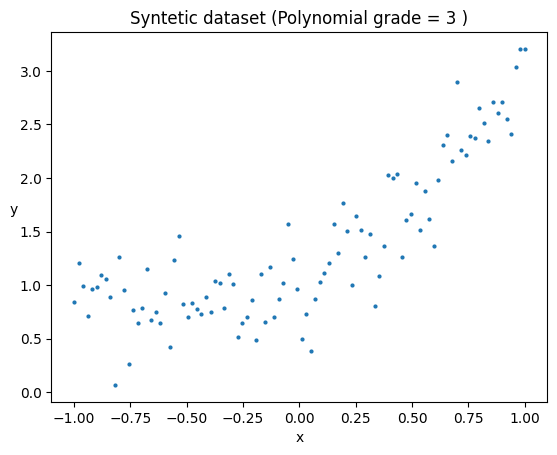

In [4]:
Phi = vander(Xtrain, K)
print("Phi shape : {}".format(Phi.shape))
theta_true = np.ones((K, 1)) 

noise = np.random.normal(0, np.sqrt(sigma), (N, 1))

ytrain = Phi @ theta_true + noise
print("Y shape : {}".format(ytrain.shape))



import matplotlib.pyplot as plt
plt.scatter(Xtrain, np.reshape(ytrain, (N,)), s=4)
plt.title("Syntetic dataset (Polynomial grade = {} )".format(K))
plt.xlabel("x")
plt.ylabel("y", rotation = 0)
plt.show()

In [5]:
def maximum_likelihood(Phi, y):
    
    S = Phi.T @ Phi
    try :
        L = np.linalg.cholesky(S)
    except:
        epsilon = 1e-6
        identity = epsilon * np.eye(S.shape[1])
        S += identity
        try :
            L = np.linalg.cholesky(S)
        except :
            return np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
    b = Phi.T @ y
    temp = np.linalg.inv(L) @ b
    theta = np.linalg.inv(L.T) @ temp
    return theta

def absolute_error(theta, Xtest, ytest) -> float:
    '''      
    Test the acccuracy of the parameters theta on a test set
    '''
    N = ytest.shape[0]
    Phi = vander(Xtest, theta.shape[0])
    prediction = Phi @ theta

    error = np.linalg.norm(prediction - ytest)**2

    return error / N  

(50, 1)


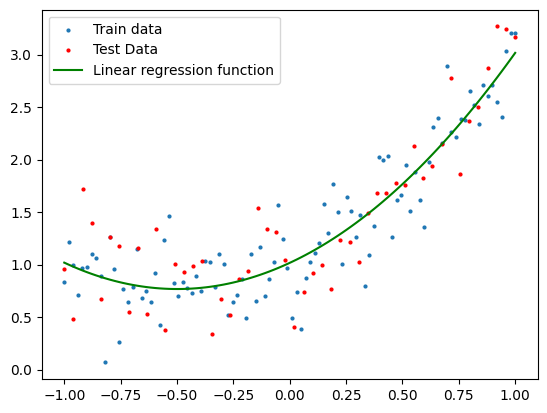

Absolute error on test set : 0.10882542686401832


In [6]:
theta = maximum_likelihood(Phi, ytrain)
            
Y_ml = Phi @ theta

Ntest = 50
Xtest = np.linspace(a, b, Ntest)

Phitest = vander(Xtest, K)
theta_test = np.ones((K, 1))
ytest = Phitest @ theta_test + np.random.normal(0, np.sqrt(sigma), (Ntest, 1))

print(ytest.shape)

plt.scatter(Xtrain, np.reshape(ytrain, (N,)), s=4)
plt.scatter(Xtest, ytest, s=4, c='r')
plt.plot(Xtrain, Y_ml, 'g')
plt.legend(("Train data", "Test Data", "Linear regression function"))
plt.show()

acc = absolute_error(theta, Xtest, ytest)
print("Absolute error on test set : {}".format(acc))

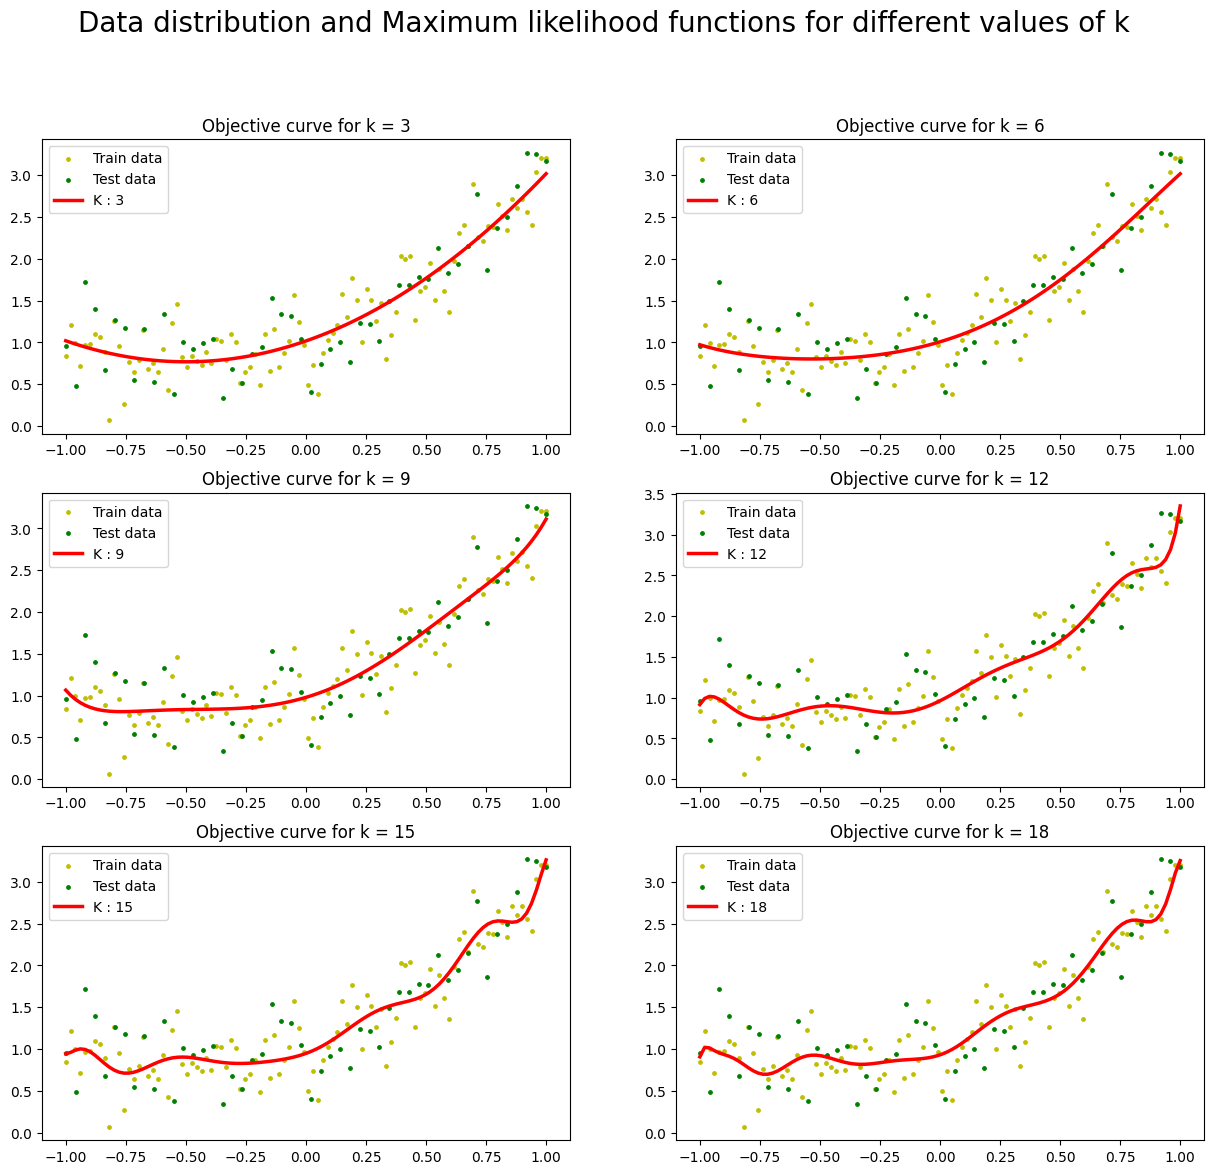

In [7]:
i = 1
fig = plt.figure(figsize=(15, 13))
fig.suptitle("Data distribution and Maximum likelihood functions for different values of k", fontsize = 20)
k_range = range(3, 19, 3)
for k_pred in k_range:

    plt.subplot(3, 2, i,)
    
    i += 1

    Phi_pred = vander(Xtrain, k_pred)
    
    theta_pred = maximum_likelihood(Phi_pred, ytrain)

    predictor = Phi_pred @ theta_pred
    plt.scatter(Xtrain, np.reshape(ytrain, (N,)), s=6, c='y')
    plt.scatter(Xtest, np.reshape(ytest, (Ntest,)), s=6, c='g')
    plt.plot(Xtrain, predictor, 'r', linewidth=2.5) 
    plt.title("Objective curve for k = {}".format(k_pred))
    plt.legend(("Train data", 'Test data', "K : {}".format(k_pred)))


plt.show()

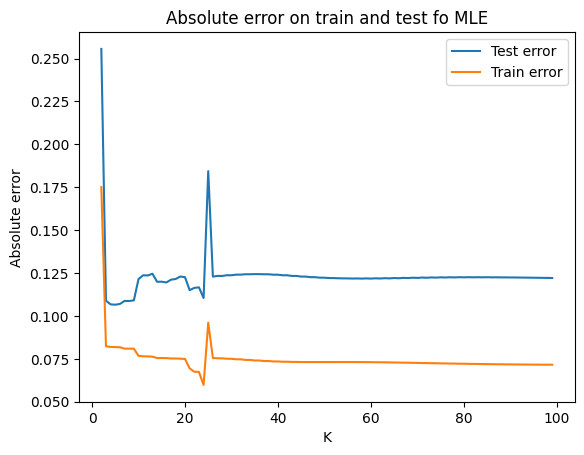

In [8]:
abs_err_test = []
abs_error_train = []
rg = range(2, 100, 1) 
for k_pred in rg:
    Phi_pred = vander(Xtrain, k_pred)
    
    theta_pred = maximum_likelihood(Phi_pred, ytrain)

    predictor = Phi_pred @ theta_pred
    
    training_error = absolute_error(theta_pred, Xtrain, ytrain)
    test_error = absolute_error(theta_pred, Xtest, ytest)
    
    abs_error_train.append(training_error)
    abs_err_test.append(test_error)
plt.figure()
plt.plot(rg, abs_err_test)
plt.plot(rg, abs_error_train)
plt.title("Absolute error on train and test fo MLE")
plt.xlabel("K")
plt.ylabel("Absolute error")
plt.legend(("Test error", "Train error"))
plt.show()

In [9]:
import scipy as sc
def MAP(X, y, lmbda, k):
    Phi = vander(X, k)

    S = Phi.T @ Phi 
    I = np.identity(S.shape[0])

    S_reg = S + lmbda * I

    try :
        L = np.linalg.cholesky(S_reg)
    except:
        epsilon = 1e-6
        identity = epsilon * np.eye(S_reg.shape[1])
        S_reg += identity
        try :
            L = np.linalg.cholesky(S_reg)
        except :
            return np.linalg.solve(S_reg, Phi.T @ y)
    
    b = Phi.T @ y 

    x1 = sc.linalg.solve_triangular(L, b, lower=True)

    theta = sc.linalg.solve_triangular(L.T, x1)
    
    return theta

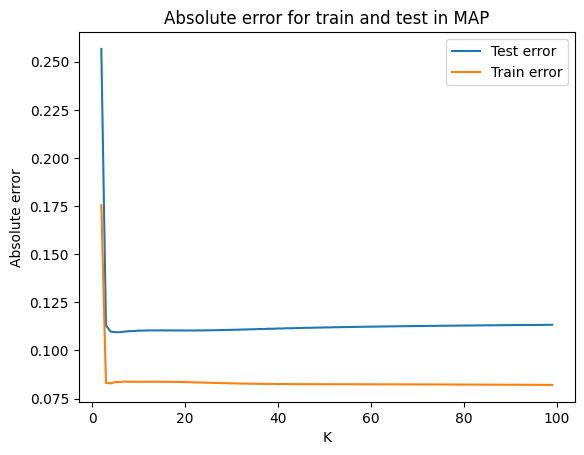

In [10]:
abs_err_test = []
abs_error_train = []
rg = range(2, 100, 1)
for k_pred in rg:
    
    Phi_pred = vander(Xtrain, k_pred)
    
    theta_pred = MAP(Xtrain, ytrain, 1, k_pred)

    predictor = Phi_pred @ theta_pred
    
    training_error = absolute_error(theta_pred, Xtrain, ytrain)
    test_error = absolute_error(theta_pred, Xtest, ytest)
    
    abs_error_train.append(training_error)
    abs_err_test.append(test_error)
plt.figure()
plt.plot(rg, abs_err_test)
plt.plot(rg, abs_error_train)
plt.title("Absolute error for train and test in MAP")
plt.xlabel("K")
plt.ylabel("Absolute error")
plt.legend(("Test error", "Train error"))
plt.show()

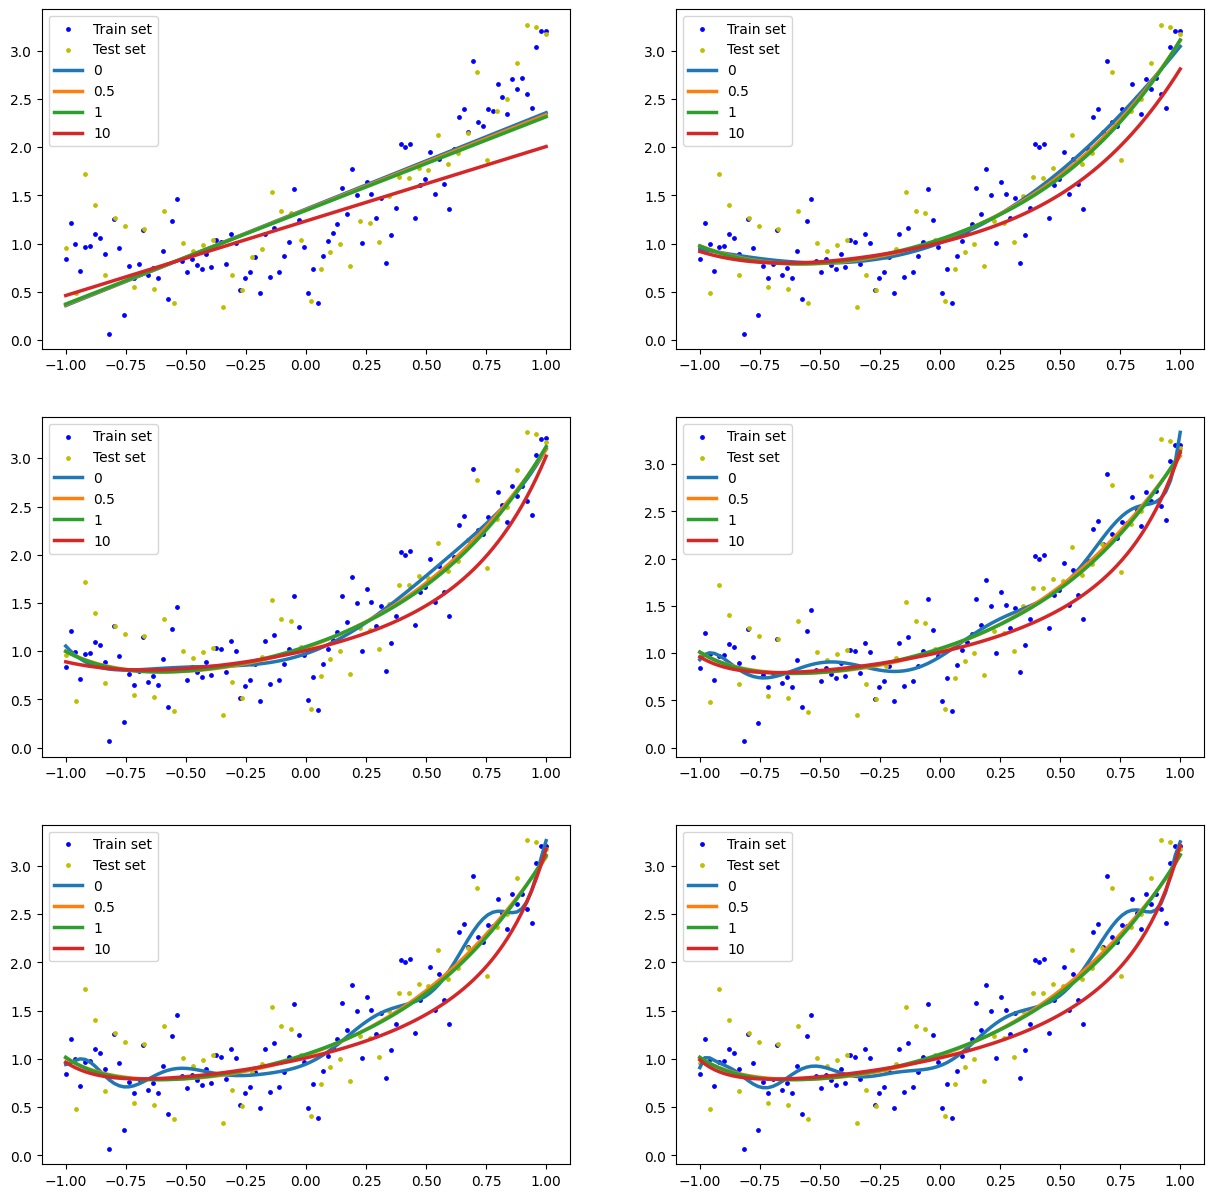

In [11]:

lb_list = [0, 0.5, 1, 10] 


i = 1
plt.figure(figsize=(15, 15))
k_range = range(2, 18, 3)
for k_pred in k_range:
    plt.subplot(3, 2, i)
    
    i += 1

    Phi_pred = vander(Xtrain, k_pred)
    plt.scatter(Xtrain, np.reshape(ytrain, (N,)), s=6, c='b')
    plt.scatter(Xtest, np.reshape(ytest, (Ntest,)), s=6, c='y')
    for lb in lb_list:
        theta_pred = MAP(Xtrain, ytrain, lb, k_pred)
        predictor = Phi_pred @ theta_pred
        plt.plot(Xtrain, predictor, linewidth=2.5) 
    plt.legend(["Train set", "Test set"] + lb_list)
plt.show()

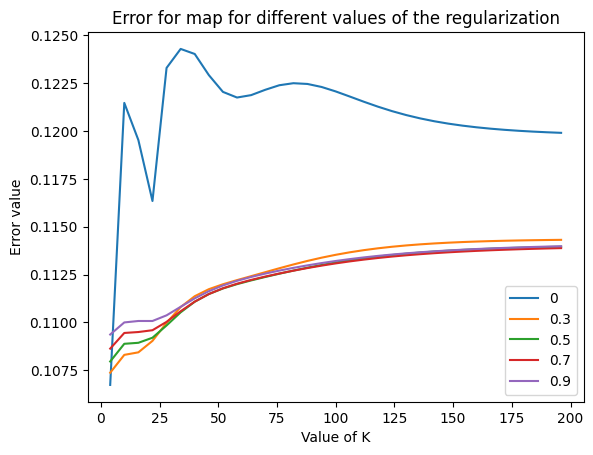

In [12]:
k_val = range(4, 200, 6)

lambda_list = [0, 0.3, 0.5, 0.7, 0.9]

for lb in lambda_list:
    errors = []
    for k in k_val:
        theta_pred_MAP = MAP(Xtrain, ytrain, lb, k)
        map_error = absolute_error(theta_pred_MAP, Xtest, ytest)
        errors.append(map_error)
    plt.plot(k_val, errors)
plt.title("Error for map for different values of the regularization")
plt.xlabel("Value of K")
plt.ylabel("Error value")
plt.legend(lambda_list)
plt.show()

In [13]:
def param_error(pred_theta, true_theta):
    dim_diff = pred_theta.shape[0] - true_theta.shape[0]
    if dim_diff > 0:

        true_theta_padded = np.concatenate((true_theta, np.zeros(dim_diff)))
        err = np.linalg.norm(pred_theta - true_theta_padded)
        rel_err = err / np.linalg.norm(true_theta_padded)
    # Now we can compute the error
    else :
        err = np.linalg.norm(pred_theta - true_theta)
        rel_err = err / np.linalg.norm(true_theta)

    return rel_err

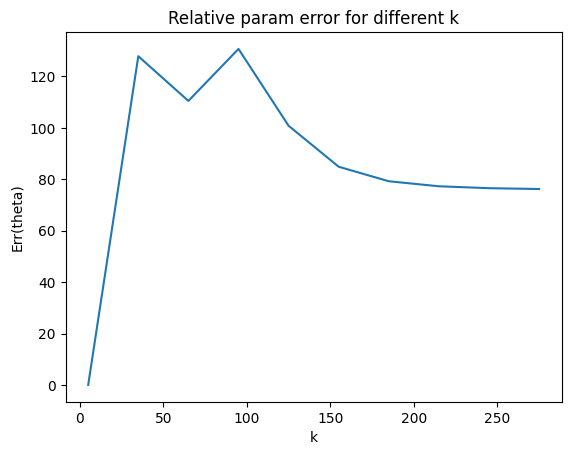

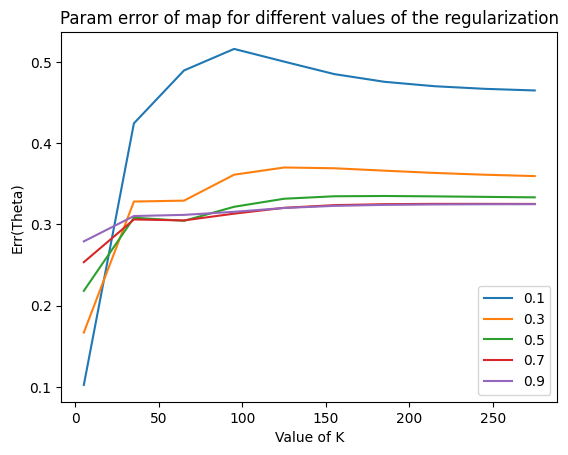

In [14]:
k_range = range(5, 300, 30)


ML_param_errors = []
for k in k_range:
    
    Phi = vander(Xtrain, k)
    ML_theta = maximum_likelihood(Phi, ytrain)
    param_err = param_error(np.reshape(ML_theta, (k,)), np.ones((K,)))
    ML_param_errors.append(param_err)
plt.plot(k_range, ML_param_errors)
plt.title("Relative param error for different k")
plt.xlabel("k")
plt.ylabel("Err(theta)")
plt.show()

lambda_list = [0.1, 0.3, 0.5, 0.7, 0.9]
for lb in lambda_list:
    param_errors = []
    for k in k_range:
        theta_pred_MAP = MAP(Xtrain, ytrain, lb, k)
        param_err_map = param_error(np.reshape(theta_pred_MAP, (k, )), np.reshape(theta_true, (K,)))
        param_errors.append(param_err_map)
    plt.plot(k_range, param_errors)
plt.title("Param error of map for different values of the regularization")
plt.xlabel("Value of K")
plt.ylabel("Err(Theta)")
plt.legend(lambda_list)
plt.show()

In [15]:
def SGD(loss, grad_l, w0, data, batch_size, n_epochs, alpha = 0.01):

    epoch = 1


    X, y = data
    X = X.T
    _, N = X.shape

    total_number_iter = (N // batch_size) * n_epochs
    tot_iter = 0
    l = w0.shape[0]
    
    
    weights_array = np.zeros((total_number_iter, l))
    loss_array = np.zeros((n_epochs, 1))
    gradient_array = np.zeros((n_epochs, l)) 
    err_array = np.zeros((n_epochs, 1))

    iter_epoch = N // batch_size
    
    X_shuffled, y_shuffled = shuffle_dataset(X, y)
    
    while epoch <= n_epochs:
        
        start = 0 
        end = batch_size
        for i in range(iter_epoch):
            w0 = w0.reshape((w0.shape[0], 1))
            
            X_sample = X_shuffled[:, start:end]
            y_sample = y_shuffled[start:end]
            
            start = end
            end = end + batch_size
            grad = grad_l(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)
            
    
            w0 -= alpha * np.reshape(grad, (l, 1))

            weights_array[tot_iter, :] = w0.reshape((w0.shape[0], ))
            tot_iter += 1

            if tot_iter % 1000 == 0:
                loss_value = loss(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)
                grad_norm = np.linalg.norm(grad)
                print('At iteration {}\ntotal loss = {} ; error = {}'.format(tot_iter, loss_value, grad_norm))
            
            
        
        loss_value = loss(w0, np.reshape(X_sample, (X_sample.shape[1],)), y_sample)

        
        grad_norm = np.linalg.norm(grad)

        
        

        loss_array[epoch - 1] = np.reshape(loss_value, 1)
        gradient_array[epoch - 1, :] = np.reshape(grad, (l, ))
        err_array[epoch - 1] = grad_norm
 
        X_shuffled, y_shuffled = shuffle_dataset(X, y)
        epoch += 1

    return weights_array, loss_array, gradient_array, err_array
           
def shuffle_dataset(X, y):

    idxs = np.arange(X.shape[1])
    np.random.shuffle(idxs)
    
    X_sample = X[:, idxs]
    y_sample = y[idxs]
    
    return X_sample, y_sample 

def vd(k):
    return lambda x : np.vander(x, k)

def f3(k):
    
    A = vd(k)
    return lambda theta, x, y : np.linalg.norm(A(x) @ theta - y)**2

def grad_f3(k):
    A = vd(k)
    return lambda theta, x, y : (-2 * (y - A(x) @ theta).T @ A(x)).reshape(theta.shape[0], 1)

def f4(k, lmbd):   
    A = vd(k)
    return lambda theta, x, y : np.linalg.norm(A(x) @ theta - y) + lmbd / 2 * np.linalg.norm(theta)**2

def grad_f4(k, lmbd):
    A = vd(k)
    return lambda theta, x, y: (-2 * ((y - A(x) @ theta).T @ A(x) + lmbd * theta.T)).reshape(theta.shape[0], 1)

At iteration 1000
total loss = 8.08889014332074 ; error = 0.6497969505384417
At iteration 2000
total loss = 7.948765038885501 ; error = 0.4275178610592583
At iteration 3000
total loss = 7.8840469133357916 ; error = 0.29837553807728184
At iteration 4000
total loss = 7.851388932941391 ; error = 0.21692714955224465
At iteration 5000
total loss = 7.833382343845415 ; error = 0.16546215756437307
At iteration 6000
total loss = 7.822397080723565 ; error = 0.13289472097945385
At iteration 7000
total loss = 7.814974965294412 ; error = 0.1120137093247444
At iteration 8000
total loss = 7.809489687864322 ; error = 0.09824909165603331
At iteration 9000
total loss = 7.805137997361296 ; error = 0.08883305463723985
At iteration 10000
total loss = 7.801497756798603 ; error = 0.08214608080801969
At iteration 1000
total loss = 0.06477071472905888 ; error = 0.5289114685328069
At iteration 2000
total loss = 0.007833586883406539 ; error = 0.22842920564004351


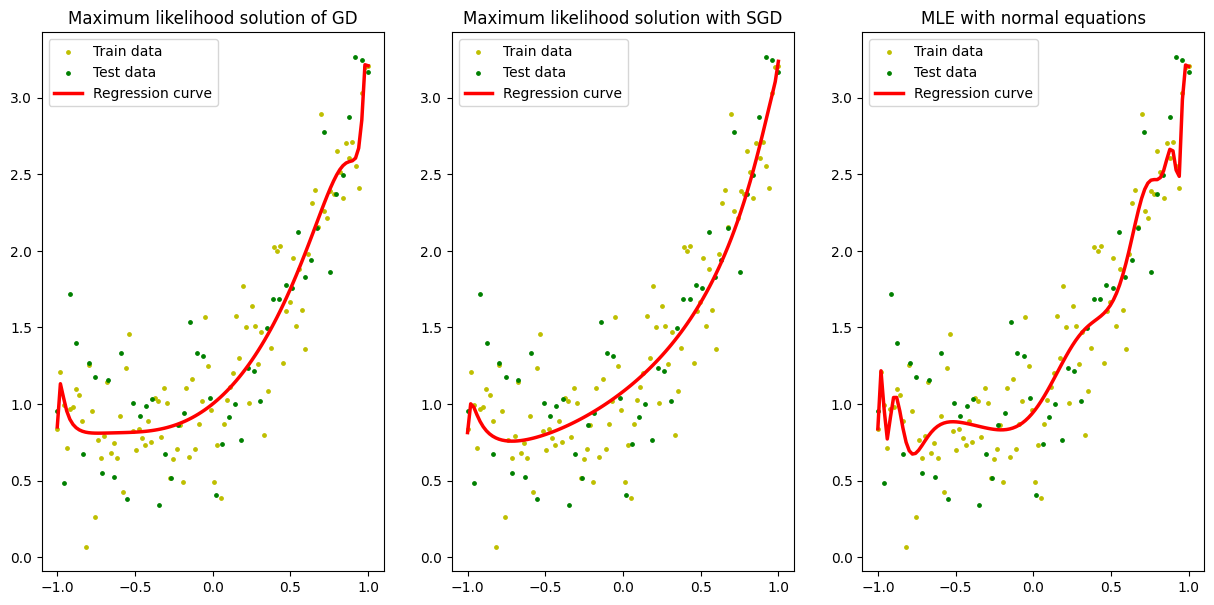

In [16]:
k = 100
lb = 0.9

Phi = vander(Xtrain, K)
ytrue = Phi @ theta_true 


N = Xtrain.shape[0]

ml_function = f3(k)
grad_ml = grad_f3(k)
w0 = np.random.normal(0, 0.01, (k, 1))
theta_ML_arrayGD, _, _, _ = SGD(ml_function, grad_ml, w0, 
                                (np.reshape(Xtrain, (Xtrain.shape[0], 1)), ytrain),
                                batch_size = N, 
                                n_epochs = 10000, 
                                alpha=0.0005)

w0 = np.random.normal(0, 0.01, (k, 1))
theta_ML_arraySGD, _, _, _, = SGD(ml_function, grad_ml, w0,
                                 (np.reshape(Xtrain, (Xtrain.shape[0], 1)), ytrain),
                                 batch_size = 1,
                                 n_epochs = 20,
                                 alpha=0.005)

w_gd = theta_ML_arrayGD[-1]
w_sgd = theta_ML_arraySGD[-1]
y_pred = np.vander(Xtrain, k) @ np.reshape(w_gd, (w_gd.shape[0]))
y_predSGD = np.vander(Xtrain, k) @ np.reshape(w_sgd, (w_sgd.shape[0]))

plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.scatter(Xtrain, ytrain, s=6, c='y')
plt.scatter(Xtest, ytest, s=6, c='g')
plt.plot(Xtrain, y_pred, 'r', linewidth = 2.5)
plt.legend(("Train data", "Test data", "Regression curve"))
plt.title("Maximum likelihood solution of GD")

plt.subplot(1, 3, 2)
plt.scatter(Xtrain, ytrain, s=6, c='y')
plt.scatter(Xtest, ytest, s=6, c='g')
plt.plot(Xtrain, y_predSGD, 'r', linewidth = 2.5)
plt.title("Maximum likelihood solution with SGD")
plt.legend(("Train data", "Test data", "Regression curve"))


Phi_pred = vander(Xtrain, k)

theta_pred = maximum_likelihood(Phi_pred, ytrain)

predictor = Phi_pred @ theta_pred

plt.subplot(1, 3, 3)
plt.scatter(Xtrain, np.reshape(ytrain, (N,)), s=6, c='y')
plt.scatter(Xtest, np.reshape(ytest, (Ntest,)), s=6, c='g')
plt.plot(Xtrain, predictor, 'r', linewidth=2.5) 
plt.title("MLE with normal equations")
plt.legend(("Train data", "Test data", "Regression curve"))
plt.show()